<a href="https://colab.research.google.com/github/salmonin-o3o/ESAA_study/blob/main/250530_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝 파이토치 교과서

# 7장. 시계열 분석
## 7.1 시계열 문제
시계열 분석이란 시간에 따라 변하는 데이터를 사용하여 추이를 분석하는 것이다.
- 불규칙 변동: 시계열 자료에서 시간에 따른 규칙적인 움직임과 달리 어떤 규칙성이 없어 예측 불가능하고 우연적으로 발생하는 변동을 의미한다. ex) 전쟁, 홍수, 화재, 지진, 파업
- 추세 변동: 시계열 자료가 갖는 장기적인 변화 추세를 의미한다. ex) 국내총생산, 인구증가율
- 순환 변동: 1년 이내 주기로 곡선을 그리며 추세 변동에 따라 변동하는 것. ex) 경기 변동
- 계절 변동: 시계열 자료에서 보통 계절적 영향과 사회적 관습에 따라 1년 주기로 발생하는 것을 의미한다.

결국 시계열 데이터는 규칙적 시계열과 불규칙적 시계열로 나눌 수 있다. 규칙적 시계열은 트렌드와 분산이 불변하는 데이터이며, 불규칙적 시계열은 트렌드 혹은 분산이 변화하는 시계열 데이터이다. 불규칙성을 갖는 시계열 데이터은 특정한 기법이나 모델을 적용하여 규칙적 패턴을 찾거나 예측해야한다. 규칙성을 부여하는 방법으로는 AR, MA, ARMA, ARIMA 모델이 있다. 딥러닝을 사용할 수도 있다.

## 7.2 AR, MA, ARMA, ARIMA
시계열 분석은 독립 변수를 사용하여 종속 변수를 예측하는 일반적인 머신 러닝에서 시간을 독립 변수로 사용한다는 특징이 있다.

### 7.2.1 AR 모델
AR(자기 회귀) 모델은 이전 관측 값이 이후 관측 값에 영향을 준다는 아이디어에 대한 모형이다.

### 7.2.2 MA 모델
MA(이동 평균) 모델은 트렌드가 변화하는 상황에 적합한 회귀모델이다. 시계열을 따라 윈도우 크기만큼 슬라이딩된다. 이전 데이터의 상태에서 현재 데이터의 상태를 추론하는 것이 아닌, 이전 데이터의 오차에서 현재 데이터의 상태를 추론한다.

### 7.2.3 ARMA 모델
ARMA(자기 회귀 이동 평균) 모델은 AR과 MA를 섞은 모델이다.

###7.2.4 ARIMA 모델
ARIMA(자기 회귀 누적 이동 평균)모델은 자기 회귀와 이동 평균을 둘 다 고려하는 모형인데, ARMA와 달리 과거 데이터의 선형 관계뿐만 아니라 추세까지 고려한 모델이다.

ARIMA는 파이썬 코드를 이용하여 직접 살펴보자.
statsmodels 라이브러리를 이용하여 ARIMA 모델을 구현한다.

+)statsmodels 라이브러리
- 검정 및 추정
- 회귀 분석
- 시계열 분석



In [3]:
!pip install statsmodels

In [4]:
# ARIMA()함수를 호출하여 sales 데이터셋에 대한 예측
from pandas import read_csv # 파이썬 판다스 라이브러리의 read_csv() 메서드를 사용해서 외부 TEXT 파일, CSV 파일을 불러와서 DataFrame으로 저장
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from google.colab import drive

def parser(x): # 시간을 표현하는 함수 정의
	return datetime.strptime('199'+x, '%Y-%m') #strptime()은 날짜와 시간 정보를 문자열로 바꾸어 주는 메서드

drive.mount('/content/drive')
series = read_csv('/content/drive/My Drive/pythonprogramming/ESAA/25-1/sales.csv')
series = series.iloc[:-1, :]
series.to_csv('/content/drive/My Drive/pythonprogramming/ESAA/25-1/sales.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-5-f4d1accc742a>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/My Drive/pythonprogramming/ESAA/25-1/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser).squeeze("columns") # 자전거 매출에 대한 CSV 데이터 호출
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

                                           SARIMAX Results                                           
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   36
Model:                                        ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                                       Mon, 26 May 2025   AIC                            408.969
Time:                                               08:02:23   BIC                            418.301
Sample:                                           01-01-1991   HQIC                           412.191
                                                - 12-01-1993                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014     

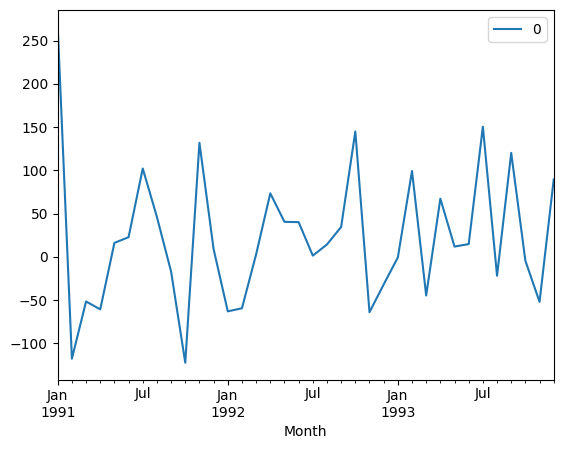

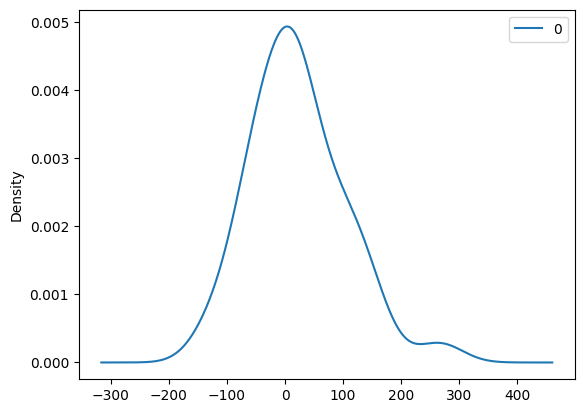

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [5]:
series = read_csv('/content/drive/My Drive/pythonprogramming/ESAA/25-1/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser).squeeze("columns") # 자전거 매출에 대한 CSV 데이터 호출
model = ARIMA(series, order=(5,1,0)) # ARIMA() 함수 호출
model_fit = model.fit() # 모형을 적용할 때 많은 디버그 정보가 제공되는데 disp 인수를 0으로 설정하여 이 기능을 비활성화
print(model_fit.summary()) # 모델에 대한 정보 표시
residuals = DataFrame(model_fit.resid) # DataFrame에 모델에 대한 오차 정보를 residuals라는 변수에 저장
residuals.plot() # residuals 정보를 시각적으로 표현
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

이와 같이 실행 결과는 오류 분포가 표시되는데, 결과를 보면 값이 치우쳐 있음을 확인할 수 있다. (오류 평균 값이 0이 아니다.)

이제 ARIMA() 함수를 사용한 예측을 진행해보자.

<ipython-input-6-b0d000605170>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/My Drive/pythonprogramming/ESAA/25-1/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser).squeeze("columns")


predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000
Test MSE: 7924.748


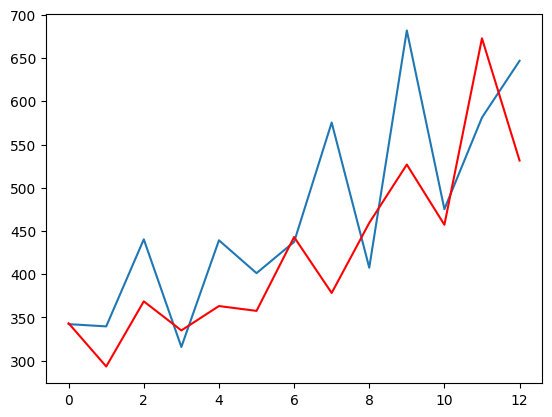

In [6]:
import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
  return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('/content/drive/My Drive/pythonprogramming/ESAA/25-1/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser).squeeze("columns")
X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)] # train과 test로 데이터셋 분리
history = [x for x in train]
predictions = list()
for t in range(len(test)): # test 데이터셋의 길이만큼 반복하여 수행
  model = ARIMA(history, order=(5,1,0)) # ARIMA() 함수 호출
  model_fit = model.fit()
  output = model_fit.forecast() # forecast() 메서드를 사용하여 예측 수행
  yhat = output[0] # 모델 출력 결과를 yhat에 저장
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs)) # 모델 실행 결과를 predicted로 출력하고, test로 분리해 둔 데이터를 expected로 사용하여 출력
error = mean_squared_error(test, predictions) # 손실 함수로 평균 제곱 오차 사용
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

실제 데이터(빨간색)와 모형 실행 결과(파란색)를 표시한 그림이 만들어졌다. 데이터가 우상향 추세를 나타내고 있으므로, 자전거 판매가 향후에도 계속 증가할 것임을 예측할 수 있다.

그러나 이 방법은 잘 쓰이지 않으며 딥러닝 기반의 시계열 모델이 잘 쓰인다. 특히 순환 신경망을 많이 사용하고 있다.

## 7.3 순환 신경망(RNN)
RNN은 시간적으로 연속성이 있는 데이터를 처리하려고 고안된 인공 신경망이다. RNN은 외부입력과 자신의 이전 상태를 입력받아 현재 상태를 갱신한다.

RNN의 유형
1. 일대일: 순환이 없기 때문에 RNN이라고 말하기 어려우며, 순방향 네트워크가 대표적 사례이다.
2. 일대다: 입력이 하나이고, 출력이 다수인 구조이다. 이미지를 입력해서 이미지에 대한 설명을 문장으로 출력하는 이미지 캡션이 대표적 사례이다.
3. 다대일: 입력이 다수이고 출력이 하나인 구조로, 문장을 입력해서 긍정/부정을 출력하는 감성 분석기에서 사용된다.
4. 다대다: 입력과 출력이 다수인 구조로, 언어를 번역하는 자동 번역기 등이 대표적인 사례이다.
5. 동기화 다대다: 입력과 출력이 다수인 구조다. 문장에서 다음에 나올 단어를 예측하는 모델, 즉 프레임 수준의 비디오 분류가 대표적 사례이다.

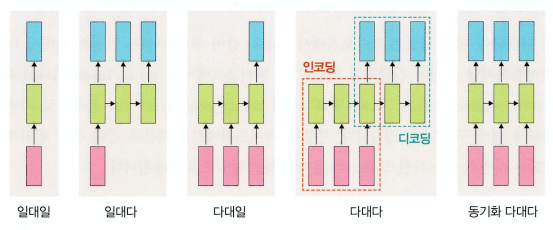

### 7.3.1 RNN 계층과 셀
RNN 계층은 셀을 래핑하여 도일한 셀을 여러 단계에 적용한다. 즉, 셀은 실제 계산에 사용되는 RNN 계층의 구성 요소로, 단일 입력과 과거 상태를 가져와서 출려과 새로운 상태를 생성한다.

셀 유형
- nn.RNNCell: SimpleRNN 계층에 대응되는 RNN 셀
- nn.GRUCell: GRU 계층에 대응되는 GRU 셀
- nn.LSTMCell: LSTM 계층에 대응되는 LSTM 셀

이렇게 RNN의 계층과 셀을 분리해서 설명하는 이유는 파이토치에서 이 둘을 분리해서 구현이 가능하기 때문이다.

RNN의 활용 분야로는 대표적으로 자연어 처리를 꼽을 수 있다.



---

# RNN 실습 코드 필사

RNN의 입츌력 단위가 단어 레벨이 아니라 문자 레벨로 하여 RNN을 구현한다면, 이를 문자 단위 RNN이라고 한다. 문자 단위 RNN을 다대다 구조로 구현해보자.

## 1. 문자 단위 RNN(Char RNN)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

### 1) 훈련 데이터 전처리하기
apple을 입력받으면 pple!를 출력하는 RNN을 구현해보자.

입력 데이터와 레이블 데이터에 대해서 문자 집합을 만든다. 이 문자 집합은 중복을 제거한 문자들의 집합이다.

In [8]:
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 5


현재 문자 집합에는 총 5개의 문자가 있다. !, a, e, l, p이다. 이제 하이퍼파라미터를 정의해준다. 이때 입력은 원-핫 벡터를 사용할 것이므로 입력의 크기는 문자 집합의 크기여야만 한다.

In [9]:
input_size = vocab_size # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

In [10]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


나중에 예측 결과를 다시 문자 시퀀스로 보기 위해서 반대로 정수로부터 문자를 얻을 수 있는 index_to_char을 만든다.

In [11]:
index_to_char={}
for key, value in char_to_index.items():
  index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


이제 입력 데이터와 레이블 데이터의 각 문자들을 저우로 맵핑한다.

In [12]:
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data) # a, p, p, l, e
print(y_data) # p, p, l, e, !

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


파이토치의 nn.RNN()은 기본적으로 3차원 텐서를 입력받는다. 그렇기 때문에 배치 차원을 추가해준다.

In [13]:
# 배치 차원 추가
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있었음.
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


입력 시퀀스의 각 문자들을 원-핫 벡터로 바꿔준다.

In [14]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


입력 데이터와 레이블 데이터를 텐서로 바꿔준다.

In [15]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

<ipython-input-15-c1bfbd518a63>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X = torch.FloatTensor(x_one_hot)


In [16]:
print('훈련 데이터의 크기: {}'.format(X.shape))
print('레이블의 크기: {}'.format(Y.shape))

훈련 데이터의 크기: torch.Size([1, 5, 5])
레이블의 크기: torch.Size([1, 5])


### 2) 모델 구현하기
이제 RNN모델을 구현해보자. 아래에서 fc는 완전 연결층을 의미하며 출력층으로 사용된다.

In [17]:
class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
    self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

  def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
    x, _status = self.rnn(x)
    x = self.fc(X)
    return x

클래스로 정의한 모델을 net에 저장한다.

In [18]:
net = Net(input_size, hidden_size, output_size)

이제 입력된 모델에 입력을 넣어서 출력의 크기를 확인해보자.

In [19]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([1, 5, 5])


(1, 5, 5)의 크기를 가지는데 각각 배치 차원, 시점, 출력의 크기이다. 나중에 정확도를 측정할 때는 이를 모두 펼쳐서 계산하게 되는데, 이때는 view를 사용하여 배치 차원과 시점 차원을 하나로 만든다.

In [21]:
print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환

torch.Size([5, 5])


In [22]:
# 레이블 데이터의 크기를 다시 복습
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


In [23]:
# 옵티마이저와 손실 함수 정의
critertion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [24]:
# 총 100번의 에포크를 학습
for i in range(100):
  optimizer.zero_grad()
  outputs = net(X)
  loss = critertion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
  loss.backward() # 기울기 계산
  optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트

  # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
  result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-stop 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
  result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
  print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.8393856287002563 prediction:  [[1 2 2 1 3]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  aeeal
1 loss:  1.633385419845581 prediction:  [[1 2 2 1 3]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  aeeal
2 loss:  1.449652910232544 prediction:  [[4 2 2 1 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  peea!
3 loss:  1.287706732749939 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
4 loss:  1.1461293697357178 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
5 loss:  1.0235999822616577 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
6 loss:  0.9183362126350403 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
7 loss:  0.828213095664978 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
8 loss:  0.7509405612945557 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
9 loss:  0.6843035817146301 prediction:  [[4 4 4 2 0]] true

## 2. 더 많은 데이터로 학습한 문자 단위 RNN(Char RNN)

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

다음과 같이 임의의 샘플을 만든다.

### 1) 훈련 데이터 전처리하기

In [26]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [29]:
char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩

In [30]:
print(char_dic) # 공백도 여기서는 하나의 원소

{'a': 0, 'h': 1, 'e': 2, "'": 3, 'g': 4, 'i': 5, 'd': 6, ' ': 7, 's': 8, 'u': 9, '.': 10, 'm': 11, 'o': 12, 'w': 13, 't': 14, 'b': 15, 'f': 16, 'l': 17, 'n': 18, 'y': 19, 'c': 20, ',': 21, 'r': 22, 'k': 23, 'p': 24}


각 문자에 정수가 부여되었으며, 총 25개의 문자가 존재한다. 문자 집합의 크기를 확인해보자.

In [31]:
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

문자 집합의 크기 : 25


문자 집합의 크기는 25이며, 입력을 원-핫 벡터로 사용할 것이므로 이는 매 시점마다 들어갈 입력의 크기이기도 하다. 이제 하이퍼파라미터를 설정한다. hidden_size(은닉 상태의 크기)를 입력의 크기와 동일하게 줬는데, 이는 사용자의 선택으로 다른 값을 줘도 무방하다.

그리고 sequence_length라는 변수를 선언했는데, 우리가 앞서 만든 샘플을 10개 단위로 끊어서 샘플을 만들 예정이기 때문이다.

In [32]:
# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10 # 임의 숫자 지정
learning_rate = 0.1

다음은 10의 단위로 샘플들을 잘라서 데이터를 만드는 모습이다.

In [34]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
  x_str = sentence[i:i + sequence_length]
  y_str = sentence[i + 1: i + sequence_length + 1]
  print(i, x_str, '->', y_str)

  x_data.append([char_dic[c] for c in x_str]) # x str to index
  y_data.append([char_dic[c] for c in y_str]) # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

총 170개의 샘플이 생성되었다. 그리고 각 샘플의 각 문자들은 고유한 정수로 인코딩이 된 상태이다. 첫번째 샘플의 입력 데이터와 레이블 데이터를 출력해보자.

In [36]:
print(x_data[0]) # if you wan에 해당됨.
print(y_data[0]) # f you want에 해당됨.

[5, 16, 7, 19, 12, 9, 7, 13, 0, 18]
[16, 7, 19, 12, 9, 7, 13, 0, 18, 14]


한 칸씩 쉬프트 된 시퀀스가 정상적으로 출력되는 것을 볼 수 있다. 이제 입력 시퀀스에 대해서 원-핫 인코딩을 수행하고, 입력 데이터와 레이블 데이터를 텐서로 변환한다.

In [37]:
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [38]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([170, 10, 25])
레이블의 크기 : torch.Size([170, 10])


In [39]:
print(X[0]) # 원-핫 인코딩 된 결과를 보기 위해서 첫번째 샘플만 출력

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

레이블 데이터의 첫번째 샘플도 출력해보자.

In [40]:
print(Y[0])

tensor([16,  7, 19, 12,  9,  7, 13,  0, 18, 14])


위 레이블 시퀀스는 f you want에 해당된다. 이제 모델을 설계하자.

### 2) 모델 구현하기
앞서 실습한 모델과 거의 동일하지만, 이번에는 은닉층이 2개다.

In [41]:
class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
    self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x)
    return x

In [43]:
net = Net(dic_size, hidden_size, 2) # 이번에는 층을 두 개 쌓는다.

In [44]:
# 비용 함수와 옵티마이저 선언
critertion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

이제 모델에 입력을 넣어서 출력의 크기를 확인해보자.

In [45]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([170, 10, 25])


(170, 10, 25)의 크기를 가지는데 각각 배치 차원, 시점(timesteps), 출력의 크기이다. 나중에 정확도를 측정할 때는 이를 모두 펼쳐서 계산하게 되는데, 이때는 view를 사용하여 배치 차원과 시점 차원을 하나로 만든다.

In [46]:
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.

torch.Size([1700, 25])


In [47]:
#레이블 데이터의 크기 다시 복습
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([170, 10])
torch.Size([1700])


레이블 데이터는 (170, 10)의 크기를 가지는데, 마찬가지로 나중에 정확도를 측정할 때는 이걸 펼쳐서 계산할 예정이다. 이 경우 (1700)의 크기를 가지게 된다. 이제 옵티마이저와 손실 함수를 정의한다.

In [48]:
for i in range(100):
  optimizer.zero_grad()
  outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
  loss = critertion(outputs.view(-1, dic_size), Y.view(-1))
  loss.backward()
  optimizer.step()

  # results의 텐서 크기는 (170, 10)
  results = outputs.argmax(dim=2)
  predict_str = ""
  for j, result in enumerate(results):
    if j == 0: # 처음에는 예측 결과를 전부 가져오지만
      predict_str += ''.join([char_set[t] for t in result])
    else: # 그 다음에는 마지막 글자만 반복 추가
      predict_str += char_set[result[-1]]

  print(predict_str)

'f'kikkkkkkkkikkkkkkkkkkkkikkkkkkkkkkkkkkkkkkkkkkikkkikkkkkkkkkikiiikkkkkkkkkkkkkkkkkkkkkkiikkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkikkkfikkkkkkfkkkikkkkkkkkkkkkikkkkkkkkkk
mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm
  t n  n       n nn tn n     n nt  n n    n nn  nt  n  n  t  t  nn n  n       n     nn      n n n nn ntn   n n   n nt    n     n nh     ndn n  nn n  n   n n n n      n  n  n   n n
 rio h f rheh rh ho bhrhheh dh dt wh t ph phophehpo i rho thr.hri rh .h rhrh rhhddtrhorhihdhrir th .hrihdhphr erihthhodhrh th phrihgh ph .h dhrh  trwrhrt rhrhrhhrhrier bhe.heh rht
     t   ttt ttttt  t totht tt t tto t t tdtttt tt t t t tt ttt tttt ttt t tt tht t t tt t t t tttt tttt tto    t t t t  ttthttt tttt tt ttttt tr t t t ttttt t t t t   tt tt tt t 
e d  do ddodhoddoo otduoldhdddo dhdoddoo ddhoddoodoodooehddh dhdddddoo.do dhdddooddod odo  dddo dhdo

처음에는 이상한 예측을 하지만 마지막 에포크에서는 꽤 정확한 문자를 생성하는 것을 볼 수 있다.